<a href="https://colab.research.google.com/github/vianasd/Projetos/blob/master/Doen%C3%A7as_Card%C3%ADacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contextualizando o problema

   As doenças cardiovasculares são umas das maiores causas de mortalidade no Brasil, sabemos que o risco de desenvolvimente aumenta devido a fatores tal como o tabagismo, idade, sexo masculino...

   Em nossa rotina, percebemos que grande parte da população prefere não fazer exames regularmente, dessa maneira, um algoritmo de machine learning poderia avisar a pessoa de uma possível doença cardiáca iminente.

   Assim, se avisado a tempo, muitas vezes, a pessoa pode conseguir reverter o seu quadro.

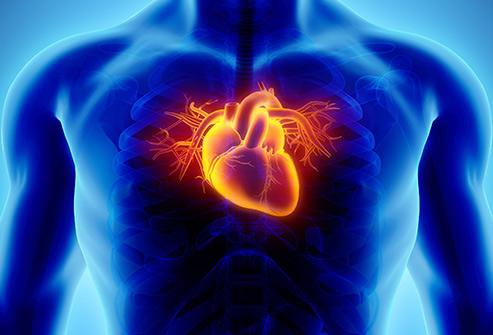

O objetivo, assim, nesse projeto é através do banco de dados de algumas pessoas conseguir predizer se a pessoa irá ter uma doença cardiaca se continuar seguindo, tais parâmetros.
Nosso target, é a classificação de sim e não, mas poderia ser a probabilidade da pessoa ter. Todavia, sabemos que o ser humano é procrastinador, ou seja, o impacto de ser advertido de ter é bem diferente do impacto de se ter 70% de chance de possuir a doença.

Em suma,



*   O dataset é referente a características de indivíduos que podem ou não ter doenças cardiacas. 
*   O objetivo é com base nesses dados criar um sistema preditivo para tal condição.



Contextualizando cada variável:


---



*   **Age:** É a idade do indivíduo em anos.
*   **Sex:** É o sexo da pessoa (1 = masculino, 0 = feminino)
*   **cp:** É a dor no peito sentida recentemente (1: angina típica, 2: angina atípica, 3: dor não anginosa, 4: assintomática)
*   **trestbps:** É a pressão de repouso da pessoa.
*   **chol:** É a medição do colesterol da pessoa em mg / dl.
*   **fbs:** É a quantidade de açucar no sangue da pessoa em jejum x, se x > 120 mg/dl (1 = verdadeiro; 0 = falso).
*   **restecg:** É a medição do eletrocardiográfica em repouso (0 = normal, 1 = tendo anormalidade da onda ST-T, 2 = mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes)
*   **thalach:** É a frequência cardíaca máxima da pessoa alcançada.
*   **exang:** O exercício induziu angina (1 = sim; 0 = não)
*   **oldpeak:** É a depressão de ST induzida por exercício em relação ao repouso.
*   **slope:** É a inclinação do segmento ST de pico do exercício (Valor 1: inclinação para cima, Valor 2: plano, Valor 3: inclinação para baixo)
*   **ca:** O número de vasos principais no coração (0-3)
*   **thal:** É Uma disordem no sanguem, denominada talassemia (3= normal, 6 defeitos irreversível, 7 = defeito reversível.
*   **target:** Se a pessoa tem ou não a doença (0 = não, 1 = sim)






# Importando as bibliotecas

Importei as bibliotecas que serão utilizadas.

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importando a base de dados




Por favor, **importe o dataset** referente ao projeto,caso queira rodar o código : [heart](https://https://www.kaggle.com/ronitf/heart-disease-uci)

Passos a seguir:

*  Leve o mouse para o canto superior esquerdo.
*  Você verá uma sequência de simbolos.
*  Click no ultimo que possui o formato de uma pasta.
*  Logo, na parte direita aparecerá a palavra upload.
*  Click em cima da palavra.
*  Nesse aspecto, busque o diretório em que se encontra o arquivo: Mission_Prediction_Dataset.csv
*   Click nele.
*   Pressione o botão abrir.


In [115]:
dados = pd.read_csv('/content/heart.csv')


In [116]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Vemos que são 303 pessoas, sobretudo que 13 dados são inteiros e 1 é real, logo possivelmente necessitaram de algum tratamento.

# Visualização da base de dados

Iremos ver a base de dados e se necessário aplicaremos no próximo tópico os tratamentos necessário.

In [117]:
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Vemos que alguns parâmetros estão na forma label encoding, isto é, observe o parâmetro da 2º coluna. Ele pode assumir os valores 0 ou 1, porém isso pode criar um viés nos modelos ou criar uma performance aquém do esperado, portanto irei transforma-los para forma one-hot-enconding, ou seja, se os valores esperados do parâmetro são 0 e 1, eu irei criar 2 parametros, sendo que o primeiro representará o 0 e o segundo o 1.

> Por exemplo:


*   0 --> 1 0
*   1 --> 0 1





---



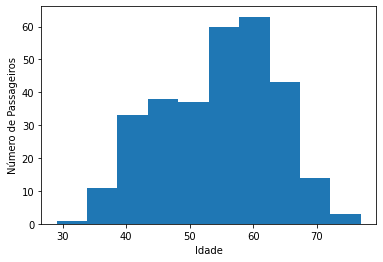

In [118]:
dados['age'].plot(kind='hist')
plt.xlabel('Idade')
plt.ylabel('Pessoas');

Percebemos que nosso dataset está bem distribuido em termos de idade, na faixa de 40 anos a 67.

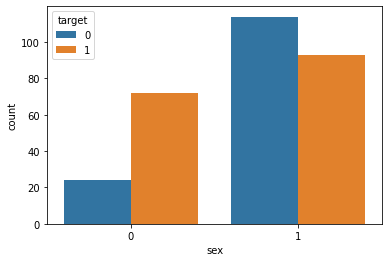

In [122]:
sns.countplot(x='sex',data=dados,hue='target');

Podemos perceber que homens tem mais propensão a terem doença cardiáca. Assim, como nosso dataset não está equilibrado, provavelmente, acontecerá mais falso positivo do que falso negativo, tendo em vista a amostra masculina. Já a amostra feminina a variação pode causar uma pequena preferência em falso negativo.

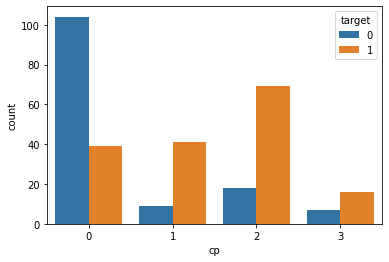

In [123]:
sns.countplot(x='cp',data=dados,hue='target');

Um alerta ai para quem sente dor no peito, com frequência, pelo gráfico vemos que ele terá uma boa correlação com o fato da pessoa possuir a doença.

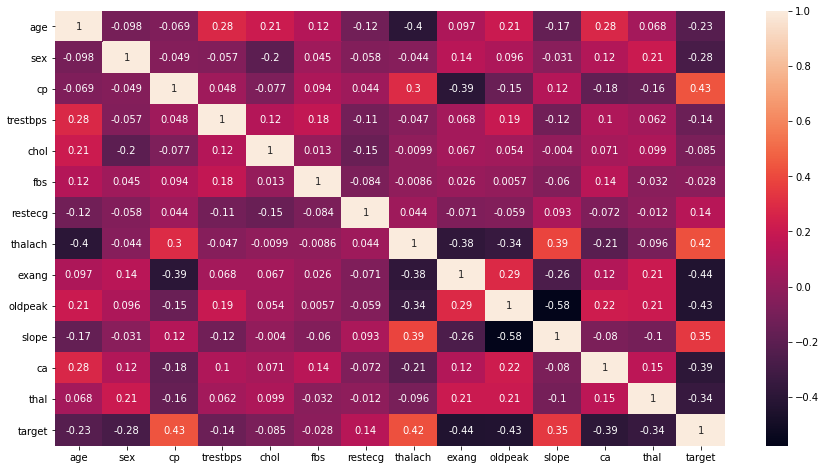

In [ ]:
plt.subplots(figsize=(15, 8))  
sns.heatmap(dados.corr(), annot = True  );

Nesse momento, estou avaliando a correlação das colunas, nessa percepção vemos que o exang possui 44% de correlação inversa se a pessoa irá ou não ter doença cardiaca, ou seja, é um indicador fraco, mas beira o moderado. Assim, tem-se mais um motivo para transformá-lo de label encoding para one-hot-encoding.

E vemos um fato que pode diminuir a eficiência dos modelos que irei adotar, o oldpeak tem uma correlação moderada com o slope, ao passo que ambos possuem correlação moderada com a presença ou não de doença, assim farei um tratamento na próxima seção para obter uma única coluna de dados proveniente dessas 2 colunas, para diminuirmos a depêndencias entre as váriaveis de teste.

Vale ressaltar, somente, que o cp diz correlação com dor no peito. Todavia, pense comigo, por exemplo, se eu estivesse analisando um sistema preditivo para pneumonia, faz sentido eu colocar a frequência que a pessoa toma antbiótico, sendo que essa característica é uma consequência da pneumonia. Nesse aspecto, eu acho que a dor no peito seria mais uma consequência do que causa, mas como não sou um especialista na área irei usá-lo. Agora, quando estiver fazendo um projeto prático vale a pena consultar especialistas, para o seu modelo preditivo não ficar enviezado com consequências do que você quer predizer.

# Tratamento das bases de dados

**Primeiramente, irei fazer um tratamento no oldpeak com o slope.**

Visto que eles possuem uma correlação quase dita como 'forte'

In [ ]:
k = dados[['oldpeak', 'slope']]
k.head()

,oldpeak,slope
0,2.3,0
1,3.5,0
2,1.4,2
3,0.8,2
4,0.6,2


O metodo aplicado para o tratamendo desses dados será o PCA(Principal Component Analisy), pois diminuir 1 coluna acarretará em perda de informação, logo com o PCA irei transformar a base das 2 colunas, numa base que a primeira coluna apresente a maior quantidade de informação possível.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Estou importando as duas biblioteca que irei utilizar para tal tratamento.

Primeiramente, normalizei os dados.

In [ ]:
scaler = StandardScaler()
scaler.fit(k)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_data = scaler.transform(k)
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

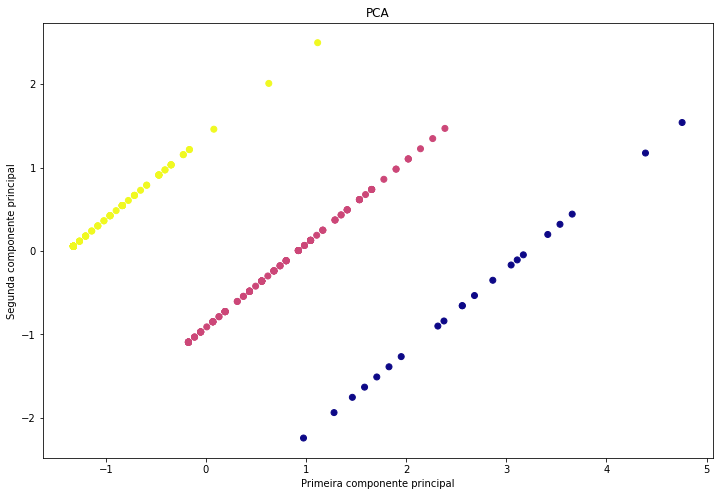

In [ ]:
x_pca = pca.transform(scaled_data)
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0], x_pca[:,1], c=dados['slope'], cmap='plasma')
plt.title('PCA')
plt.xlabel('Primeira componente principal')
plt.ylabel('Segunda componente principal');

In [ ]:
pca.explained_variance_ratio_

array([0.78876841, 0.21123159])

A primeira componente explica 78,8% do conjunto de dados. Então irei pega-la como substituto para coluna 10 e 11.

In [ ]:
r = pd.DataFrame(x_pca)

In [ ]:
r.head()

,0,1
0,2.377234,-0.839506
1,3.109256,-0.107484
2,-0.470537,0.910233
3,-0.836548,0.544223
4,-0.958551,0.422219


In [ ]:
m = r.iloc[:, :-1].values
m = pd.DataFrame(m)

In [ ]:
m.head()

,0
0,2.377234
1,3.109256
2,-0.470537
3,-0.836548
4,-0.958551




---



**Agora faremos o tratamento das colunas em label encoding**

Como eu disse, colunas em label encoding , normalmente, criam modelos menos eficientes do que em one hot encoding. Logo, irei tratá-las agora.

In [ ]:
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


As colunas em label encoding são:
*   sex
*   cp
*   fbs
*   restecg
*   exang
*   ca
*   thal











Lembra-se que o slope estava em label encoding, todavia foi tratada com o oldpeak e que a ultima coluna é um binário que caracteriza ou não a ocorrência da doença.

In [ ]:
p = dados [['sex', 'cp', 'fbs', 'restecg','exang','ca','thal']]
p.head()

,sex,cp,fbs,restecg,exang,ca,thal
0,1,3,1,0,0,0,1
1,1,2,0,1,0,0,2
2,0,1,0,0,0,0,2
3,1,1,0,1,0,0,2
4,0,0,0,1,1,0,2


Como você pode ver, só há parâmetros na forma label encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
q = onehotencoder.fit_transform(p).toarray()

Essa função transforma de label para one hot encoder, mas a apresenta como um vetor

In [ ]:
q = pd.DataFrame(q)
q.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Então, conclui-se que 7 parâmetros foram transformados em 21.


---



In [ ]:
n = dados [['age', 'trestbps', 'chol', 'thalach', 'target']]
n.head()

,age,trestbps,chol,thalach,target
0,63,145,233,150,1
1,37,130,250,187,1
2,41,130,204,172,1
3,56,120,236,178,1
4,57,120,354,163,1


Aqui possuímos os dados que não foram tratados.

Agora irei concatenar todos os parâmetros novamente.

In [ ]:
a = pd.concat([m, q], axis = 1)
a = pd.concat([a,n], axis = 1)
x = a.iloc[:, :-1].values
y = a.iloc[:,-1:].values

In [ ]:
x[0]

array([  2.37723407,   0.        ,   1.        ,   0.        ,
         0.        ,   0.        ,   1.        ,   0.        ,
         1.        ,   1.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   1.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   0.        ,  63.        ,
       145.        , 233.        , 150.        ])

Já passei para forma de vetor que será a usada na próxima sessão, só queria dar um adendo que temos 27 parametros para a predição. Assim para cada modelo serão 27 entradas e 1 saida.

# Divisão Base de treinamento X Base de teste

Nessa secção irei dividir uma parte dos dados para o treinamento, ao passo que o restante será usado para válida nosso modelo sobre a característica de accurancy, isto é o quão confiável ele é para afirmar se uma pessoa terá ou não a doença.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

Seguindo os requisitos dividi a base em 70% para treinamento e 30% para teste, além de ter colocado o random_state no valor 42.

In [ ]:
x_train.shape

(212, 27)

Assim possuímos 212 dados para o treinamento dos modelos.

In [ ]:
x_test.shape

(91, 27)

E 91 dados para o teste.

# Construção e treinamento do modelo:DecisionTree

Vamos inicialmente, usar uma árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(100, 2101, 25), 'min_samples_leaf' : [2, 5, 10, 10], 'min_samples_split' : [2, 3, 4, 5, 6]}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=3)
tree.fit(x_train, y_train)

Apaguei o treinamento do grid, para não poluir o github, com linhas desnecessárias.

Vamos verificar, como ficou as métricas do algoritmo em relação a base de treino

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

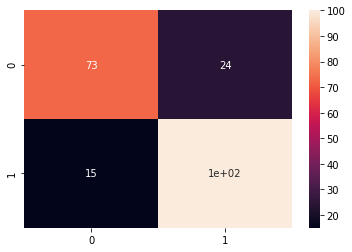

In [ ]:
tree_pred_train = model.predict(x_train)
k = confusion_matrix(y_train,tree_pred_train)
sns.heatmap(k, annot=True);

In [ ]:
print(classification_report(y_train, tree_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        97
           1       0.81      0.87      0.84       115

    accuracy                           0.82       212
   macro avg       0.82      0.81      0.81       212
weighted avg       0.82      0.82      0.82       212



Vemos pelo f1-score que o modelo errou mais para falso positivo do que falso negativo. Possuindo uma accuracy no dataset de treino de 82%

#Construção e treinamento do modelo:RandomForest

Agora iremos, usar as árvores aleátorias.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 500)
rfc.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

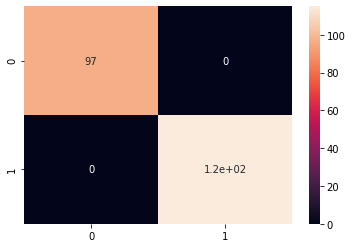

In [ ]:
rfc_pred_train = rfc.predict(x_train)
km = confusion_matrix(y_train,rfc_pred_train)
sns.heatmap(km, annot=True);

Vemos que a accuracy é de 100%, sendo que isso nem sempre significa que o modelo está perfeito, posto que pode acontecer de haver overfitting, isto é o modelo se viciar de mais na base de treinamento sendo ineficaz para prever novos resultados

In [ ]:
print(classification_report(y_train, rfc_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



# Avaliacão do modelos





**Avaliação da DecisionTree**

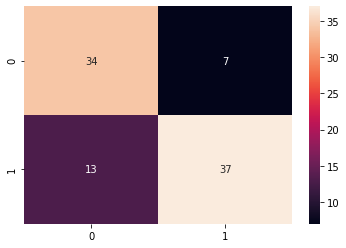

In [ ]:
tree_pred_test = tree.predict(x_test)
tree_pred_test = tree_pred_test == 1
m = confusion_matrix(y_test, tree_pred_test)
sns.heatmap(m, annot=True);

In [ ]:
print(classification_report(y_test, tree_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77        41
           1       0.84      0.74      0.79        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



Vemos que o algoritmo de árvore aleátoria não se saiu tão bem, nesse projeto.

**Avaliação da RandomForest**

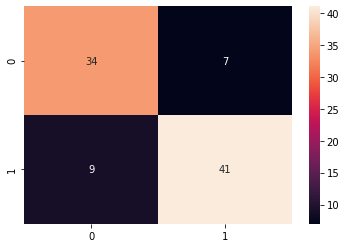

In [ ]:
rfc_pred_test = rfc.predict(x_test)
rfc_pred_test = rfc_pred_test == 1
Tree = confusion_matrix(y_test, rfc_pred_test)
sns.heatmap(Tree, annot=True);

A floresta de decisão apresentou uma accuracy de 82,4%, nesse sentido ve-se um claro problema desse modelo, pois ele possui tendência a dar overfitting. Como vemos, a redução na accuracy foi de 17,6%.

In [ ]:
print(classification_report(y_test, rfc_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        41
           1       0.85      0.82      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



# Conclusão

Podemos perceber que uma grande accuracy no modelo de treinamento não significa que o modelo é eficiente até que o mesmo seja testado.

**Por que nosso modelo não foi tão eficiente?**

Iremos desta vez usar o PCA, em toda a base de dados para visualizarmos a 
distrubuição dos dados diante das 2 componentes de maior variância, para dar uma pequena especulação do motivo.



In [ ]:
k = dados.iloc[:,:-1]
k.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


Estou pegando os dados sem nenhum tratamento, para que nossa possível explicação não tenha interferência da manipulação dos dados que eu fiz.

In [ ]:
scaler = StandardScaler()
scaler.fit(k)
scaled_data = scaler.transform(k)
pca = PCA(n_components=3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(303, 3)

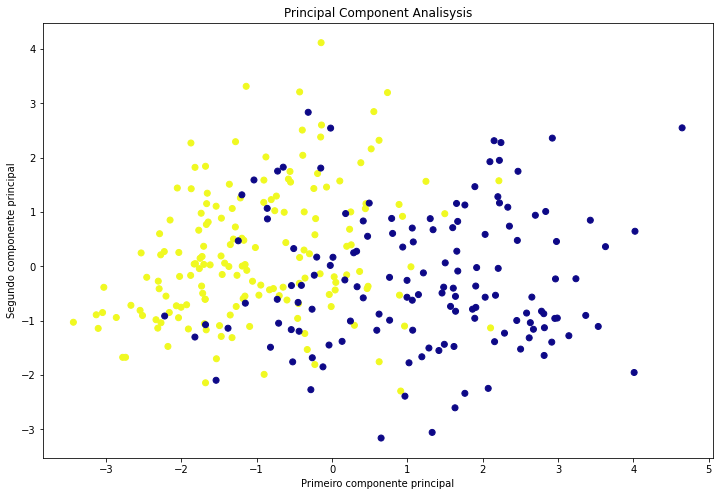

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0], x_pca[:,1], c=dados['target'], cmap='plasma')
plt.title('Principal Component Analisysis')
plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo componente principal');

In [ ]:
pca.explained_variance_ratio_

array([0.21254053, 0.11820708, 0.09406418])

Têm-se que as 2 componentes juntas possuem 33% da variância total do sistema, logo, minha conclusão para fins de cálculo podem estar equivocada, porém olhando para o gráfico vemos que muitos pontos azuis quase tocam/tocam os amarelos e muitos amarelos se aproximam dos azuis. Dessa maneira ve-se que o modelo não consegue avançar muito do que obtemos tendo em vista que existe proximidade de dados opostos. E nosso modelo busca padrões neles, logo podemos concluir que haverá uma imprecisão, mesmo que pequena, devido a fatores naturais.